In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob
from skimage import io
import sdcvehicle

%matplotlib inline
import matplotlib.pyplot as plt

## classifier

In [27]:
%time model = sdcvehicle.classification.build_model()

loaded 8792 vehicle images and 9666 nonvehicle images
built model performance on test: 0.985373781148
CPU times: user 33 s, sys: 360 ms, total: 33.4 s
Wall time: 33.3 s


In [9]:
%time classifier = sdcvehicle.classification.fit_best_model()

loaded 8792 vehicle images and 9666 nonvehicle images
Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] feature_extractor__hist_nbins=128, feature_extractor__pixels_per_cell=(6, 6), feature_extractor__cells_per_block=(3, 3), svc__C=215.443469003 
[CV]  feature_extractor__hist_nbins=128, feature_extractor__pixels_per_cell=(6, 6), feature_extractor__cells_per_block=(3, 3), svc__C=215.443469003, total=  28.9s
[CV] feature_extractor__hist_nbins=128, feature_extractor__pixels_per_cell=(6, 6), feature_extractor__cells_per_block=(3, 3), svc__C=215.443469003 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   45.1s remaining:    0.0s


[CV]  feature_extractor__hist_nbins=128, feature_extractor__pixels_per_cell=(6, 6), feature_extractor__cells_per_block=(3, 3), svc__C=215.443469003, total=  31.6s
[CV] feature_extractor__hist_nbins=128, feature_extractor__pixels_per_cell=(6, 6), feature_extractor__cells_per_block=(3, 3), svc__C=215.443469003 
[CV]  feature_extractor__hist_nbins=128, feature_extractor__pixels_per_cell=(6, 6), feature_extractor__cells_per_block=(3, 3), svc__C=215.443469003, total=  30.8s
[CV] feature_extractor__hist_nbins=32, feature_extractor__pixels_per_cell=(8, 8), feature_extractor__cells_per_block=(2, 2), svc__C=215.443469003 
[CV]  feature_extractor__hist_nbins=32, feature_extractor__pixels_per_cell=(8, 8), feature_extractor__cells_per_block=(2, 2), svc__C=215.443469003, total=  24.9s
[CV] feature_extractor__hist_nbins=32, feature_extractor__pixels_per_cell=(8, 8), feature_extractor__cells_per_block=(2, 2), svc__C=215.443469003 
[CV]  feature_extractor__hist_nbins=32, feature_extractor__pixels_per_

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 33.3min finished


best model performance on test: 0.984832069339
CPU times: user 34min 41s, sys: 10.1 s, total: 34min 51s
Wall time: 33min 54s


## detector

In [3]:
import cv2

In [4]:
test_imgs = [io.imread(f) for f in glob("../test_images/*.jpg")]

In [40]:
test_img = test_imgs[1]
test_img.shape

(720, 1280, 3)

In [41]:
detector = sdcvehicle.detection.VehicleDetector()

In [42]:
nr, nc = test_img.shape[:2]
plot_img = test_img.copy()
for patch, bbox in detector.slide_window(test_img, (nr//2, nr), (0, nc), (64, 64), (32, 32)):
#     cv2.rectangle(plot_img, bbox[0][::-1], bbox[1][::-1], (255, 0, 0), 1)
#     print(bbox)
    result = model.predict([patch])
#     print(result[0])
    if result[0] == "vehicle":
        cv2.rectangle(plot_img, bbox[0][::-1], bbox[1][::-1], (255, 0, 0), 3)

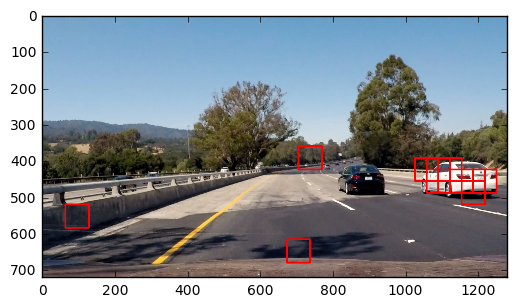

In [43]:
plt.imshow(plot_img)